In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [2]:
df = pd.read_csv("pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


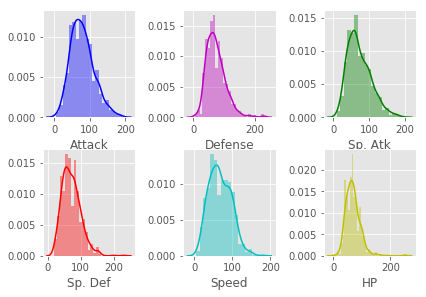

In [3]:
fig, ax = plt.subplots(2,3)
fig.tight_layout()
colors = ['b','m','g','r','c','y']
stats = ['Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']
for index, clr in enumerate(colors):
    plt.subplot(2, 3, index+1)
    sns.distplot(df[stats[index]],color=clr)

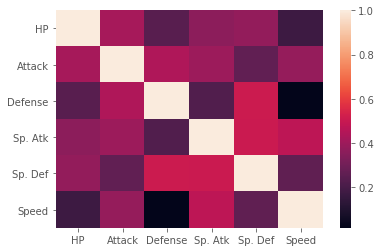

In [4]:
corr = df.iloc[:,5:11].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

plt.show()

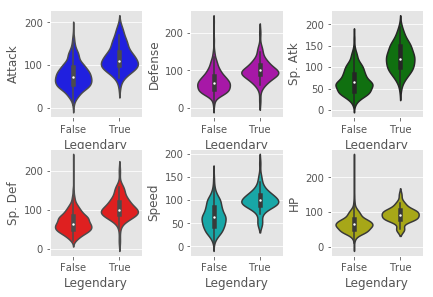

In [5]:
# legendary vs non-legendary stats distributions
fig, ax = plt.subplots(2, 3)
fig.tight_layout()
colors = ['b','m','g','r','c','y']
stats = ['Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']
for index,clr in enumerate(colors):
    plt.subplot(2, 3, index+1)
    sns.violinplot(df['Legendary'],df[stats[index]],color=clr)

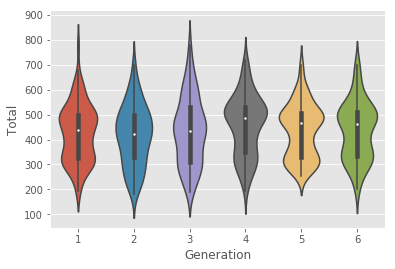

In [6]:
# distribution across generations
stats_total= df["Total"]
sns.violinplot(df['Generation'],stats_total)

plt.show()

Text(0, 0.5, 'sum of plots')

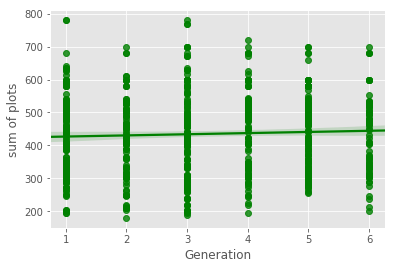

In [7]:
# linear regression model fit
plot = sns.regplot(df['Generation'],stats_total, color="g")
plot.set_ylabel("sum of plots")

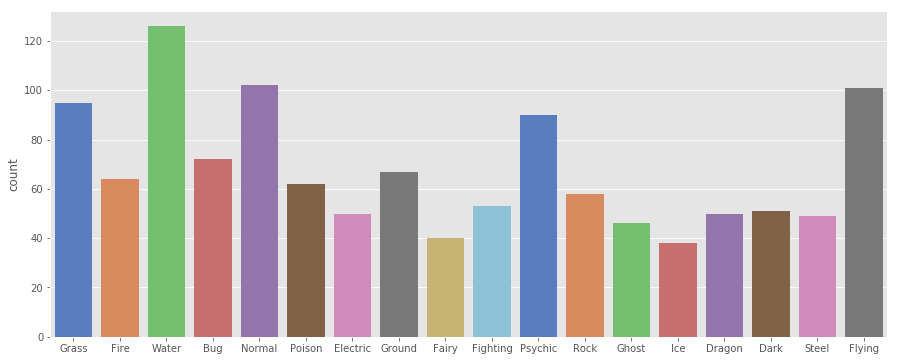

In [8]:
# plot the number of pokemon for each type
fig = plt.figure(figsize=(15,6))
sns.countplot(df['Type 1'].append(df['Type 2']), palette="muted")

plt.show()

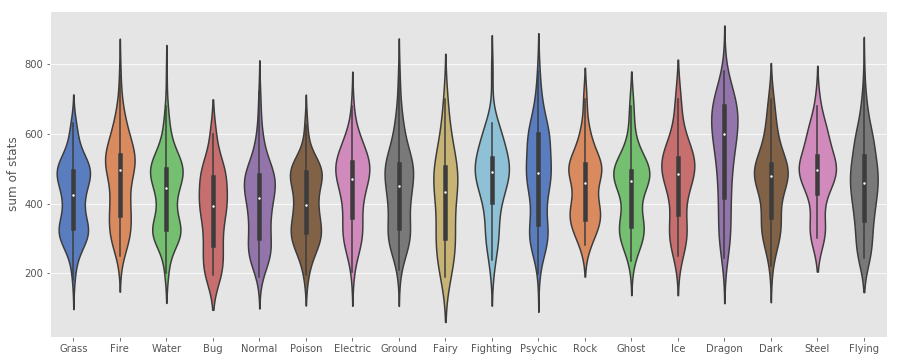

In [9]:
# som of stats across all types
fig = plt.figure(figsize=(15,6))
plot = sns.violinplot(df['Type 1'].append(df['Type 2']),stats_total.append(stats_total),palette="muted")
plot.set_ylabel('sum of stats')

plt.show()

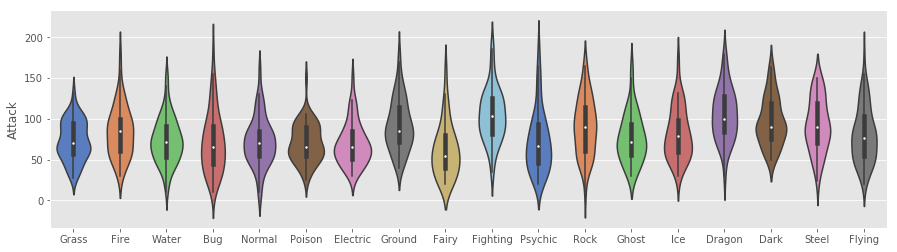

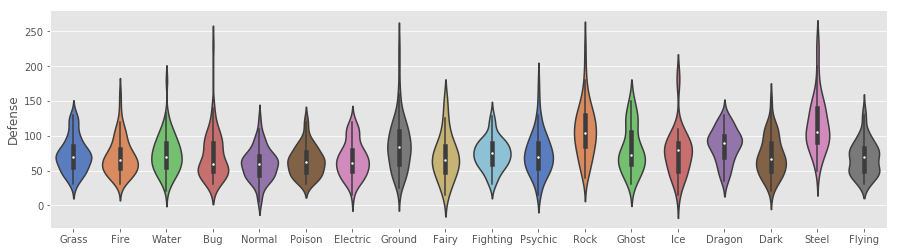

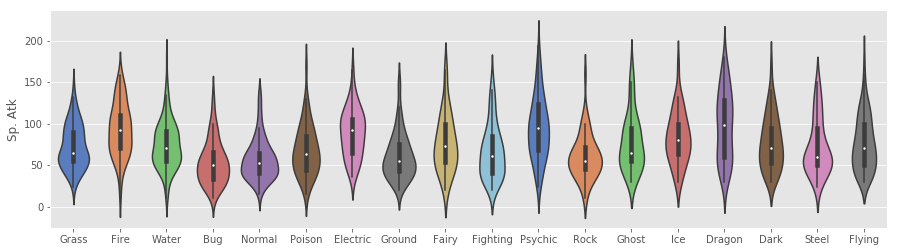

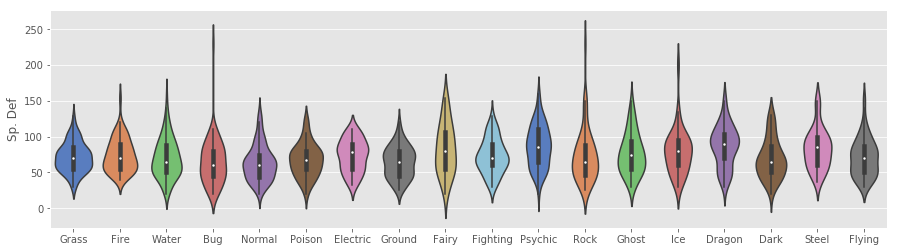

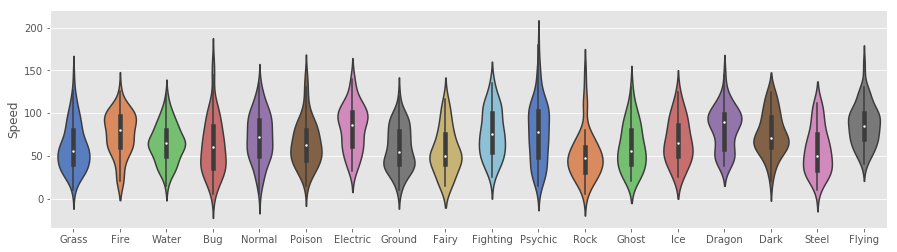

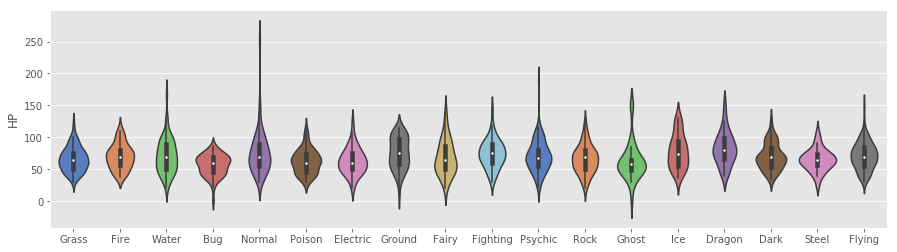

In [10]:
# various stats across all types
for stat in stats:
    fig = plt.figure(figsize=(15,4))
    sns.violinplot(df['Type 1'].append(df['Type 2']),df[stat].append(df[stat]),palette="muted")
    plt.show()

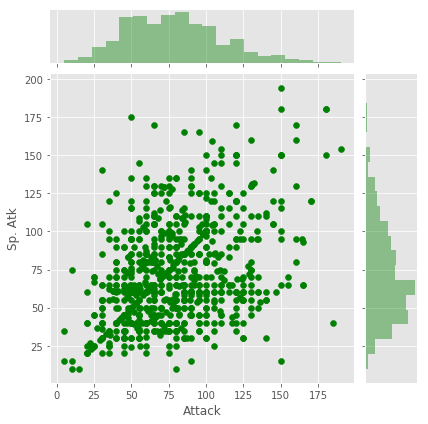

In [11]:
# pairwise correlation between stats for each pokemon
sns.jointplot(df['Attack'],df['Sp. Atk'], kind="scatter", color='g')
plt.show()

In [12]:
# add the features to data
from sklearn.preprocessing import LabelEncoder

df["Num_Types"] = 1+df.iloc[:,3:4].count(axis=1)
df["Median"] = df.iloc[:,5:11].median(axis=1)
df["Min_Max_Ratio"] = df.iloc[:,5:11].max(axis=1)/df.iloc[:,5:11].min(axis=1)
df["Max"] = df.iloc[:,5:11].idxmax(axis=1)
df["Min"] = df.iloc[:,5:11].idxmin(axis=1)
df["Is_Mega"] = df.iloc[:,1].apply(lambda x: x.find('Mega')>0)
df.head(15)

# Label strings
df["Max"] = df[["Max"]].apply(LabelEncoder().fit_transform)
df["Min"] = df[["Min"]].apply(LabelEncoder().fit_transform)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble

clf_list = [linear_model.LogisticRegression(),svm.SVC(),ensemble.RandomForestClassifier(random_state=123, n_estimators=1000)]
model = ['Logistic Regression', 'SVM', 'Random Forest Classifier']
features = ["Total","Is_Mega","Median","Min_Max_Ratio","Num_Types"]

for index,clf in enumerate(clf_list):
    print("Model is",model[index])
    scores = cross_val_score(clf, df[features].values, df["Legendary"].values, cv=10)
    print("Mean CV score is",round(np.mean(scores),3))

Model is Logistic Regression
Mean CV score is 0.949
Model is SVM
Mean CV score is 0.944
Model is Random Forest Classifier
Mean CV score is 0.959


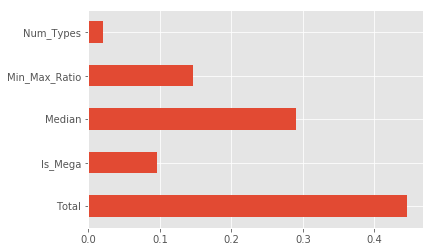

In [14]:
clf = clf_list[2] # choose Random Forest which performed the best
clf.fit(df[features].values, df["Legendary"].values)

feat_importances = pd.Series(clf.feature_importances_, index=features)
feat_importances.plot(kind='barh',grid=True)
plt.show()

In [15]:
# add more variables to check if the model is improved
score = cross_val_score(clf, df[features + ["Max","Min"]].values, df["Legendary"].values, cv=10)
print("Mean CV score is", round(np.mean(score),3))

Mean CV score is 0.965


#### The accuracy is better in the above cell.

In [16]:
# add individual stats to check the accuracy
stats = ['Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']
score = cross_val_score(clf, df[features + ["Max","Min"] + stats].values, df["Legendary"].values, cv=10)
print("Mean CV score is", round(np.mean(score),3))

Mean CV score is 0.951


#### In the above cell, we got lower accuracy as we added individual stats attributes. 